In [6]:
import run
import numpy as np
import skimage.io
import os
import pandas as pd
import importlib
importlib.reload(run)

<module 'run' from '/scratch/ottosson/datasets/src/sphericity/run.py'>

## Test cell sphericity

In [2]:
label = skimage.io.imread('/scratch/ottosson/datasets/Ovules/label/N422ds2x_label.tif')
#l,c = np.unique(label, return_counts = True)

In [3]:
cell = label == 2
sphericity = run.cell_spericity(cell)


# Test for whole image

2

In [ ]:
# test for whole data set

In [7]:
DATASET_PATH = "/scratch/ottosson/datasets"
dataset = 'SAM_SMALL'
label_path = os.path.join(DATASET_PATH,
                            dataset,
                         'label')
sphers_dict = run.folder_spericity(label_path, background_labels=[0,1])


Progression:  0.20449897750511248   100  of  489
Progression:  0.40899795501022496   200  of  489
Progression:  0.6134969325153374   300  of  489
Progression:  0.8179959100204499   400  of  489
Progression:  0.14104372355430184   100  of  709
Progression:  0.2820874471086037   200  of  709
Progression:  0.4231311706629055   300  of  709
Progression:  0.5641748942172073   400  of  709
Progression:  0.7052186177715092   500  of  709
Progression:  0.846262341325811   600  of  709
Progression:  0.9873060648801129   700  of  709


In [9]:
sphers_dict.keys()


dict_keys(['sample74', 'sample123'])

In [29]:
means = dict()
stds = dict()
totals = []
for k,v in sphers_dict.items():
    means[k]= np.nanmean(v)
    stds[k]= np.nanstd(v)
    totals.extend(v)




In [18]:
sphers_dict.keys()

dict_keys(['sample74', 'sample123'])

(array([  2.,   2.,  18.,  56., 186.,  96.,  33.,  47.,  39.,   9.]),
 array([0.62746984, 0.67330866, 0.71914748, 0.7649863 , 0.81082512,
        0.85666394, 0.90250276, 0.94834159, 0.99418041, 1.04001923,
        1.08585805]),
 <BarContainer object of 10 artists>)

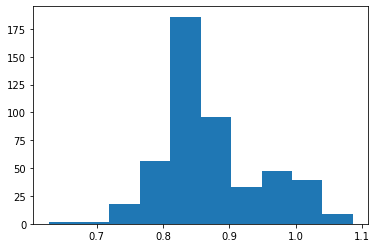

In [19]:
plt.hist(sphers_dict['sample74'])

(array([  1.,   2.,   2.,   9., 128., 388.,  52.,  46.,  55.,  25.]),
 array([0.60388597, 0.65074328, 0.69760058, 0.74445789, 0.79131519,
        0.83817249, 0.8850298 , 0.9318871 , 0.97874441, 1.02560171,
        1.07245902]),
 <BarContainer object of 10 artists>)

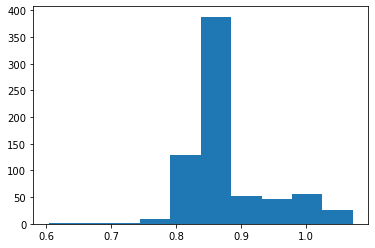

In [20]:
plt.hist(sphers_dict['sample123'])

(array([  2.,   4.,  10.,  46., 348., 502.,  63.,  94., 110.,  17.]),
 array([0.60388597, 0.65208318, 0.70028039, 0.7484776 , 0.7966748 ,
        0.84487201, 0.89306922, 0.94126643, 0.98946363, 1.03766084,
        1.08585805]),
 <BarContainer object of 10 artists>)

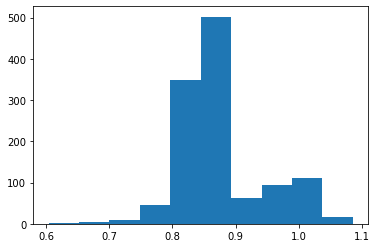

In [16]:
plt.hist(totals)

In [21]:
means

{'sample74': 0.8705203762047912, 'sample123': 0.8770964185762787}

In [31]:
save_path = os.path.join(DATASET_PATH,'FM', 'dataframes','spher_total.csv')
pd.DataFrame(data = {'sphericity': totals}).to_csv(save_path, index = False)

In [30]:

save_path = os.path.join(DATASET_PATH, 'FM', 'dataframes','spher_means.csv')
pd.DataFrame(data = [means, stds], index = ['mean', 'std']).to_csv(save_path)